# **Lab 9: Regression for Prediction (30 points)**

#### **Dylan Watson**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






The goal of this lab is to
1. build a regression model to *accurately* predict median housing price and
2. interpret the variables included in your best regression model.

<br>

Variable descriptions are found below:

  * `CRIM` - per capita crime rate by town.

  * `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.

  * `INDUS` - proportion of non-retail business acres per town.

  * `CHAS` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

  * `NOX` - nitrogen oxides concentration (parts per 10 million).

  * `RM` - average number of rooms per dwelling.

  * `AGE` - proportion of owner-occupied units built prior to 1940.

  * `DIS` - weighted mean of distances to five Boston employment centres.

  * `RAD` - index of accessibility to radial highways.

  * `TAX` - full-value property-tax rate per \$10,000.

  * `PTRATIO` - pupil-teacher ratio by town.

  * `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of black individuals by town.

  * `LSTAT` - lower status of the population (percent).

  * `MEDV` - median value of owner-occupied homes in \$1000s.

<br>

---

<br>






####<font color=red>Task 0</font>  (1 points)

1. Load the Boston Housing dataset at the following [link](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv)

2. Remove all NAs from the dataset using `na.omit()`

In [1]:
# load the dataset
url = "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv"
data = read.csv(url)
data = na.omit(data)
head(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


<br>

---

<br>






####<font color=red>Task 1</font>  (3 points)

1. Randomly partition the dataset into training and validation sets as done in lecture.
  * Use `set.seed(10)`
  * The training dataset `train` should have 300 rows
  * The validation set `valid` should have 94 rows
  * None of the rows in the training dataset should be in the validation dataset

In [2]:
set.seed(10)
samp = sample(1:nrow(data), 300)
train = data[samp, ]
nrow(train)

valid = data[-samp, ]
nrow(valid)

[1] 300

[1] 94

<br>

---

<br>






####<font color=red>Task 2</font>  (10 points)

1. Using the `train` dataset, create scatterplots and boxplots, whichever appropriate, to explore the relationship between median housing price `MEDV` (y-axis) and the other variables in the dataset. Describe what you observe in complete sentences.
  * I would like to see at least 5 plots/explanations, however, I would try plotting all variables!
  * This portion of the analysis usually takes the longest (1 hour)


Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


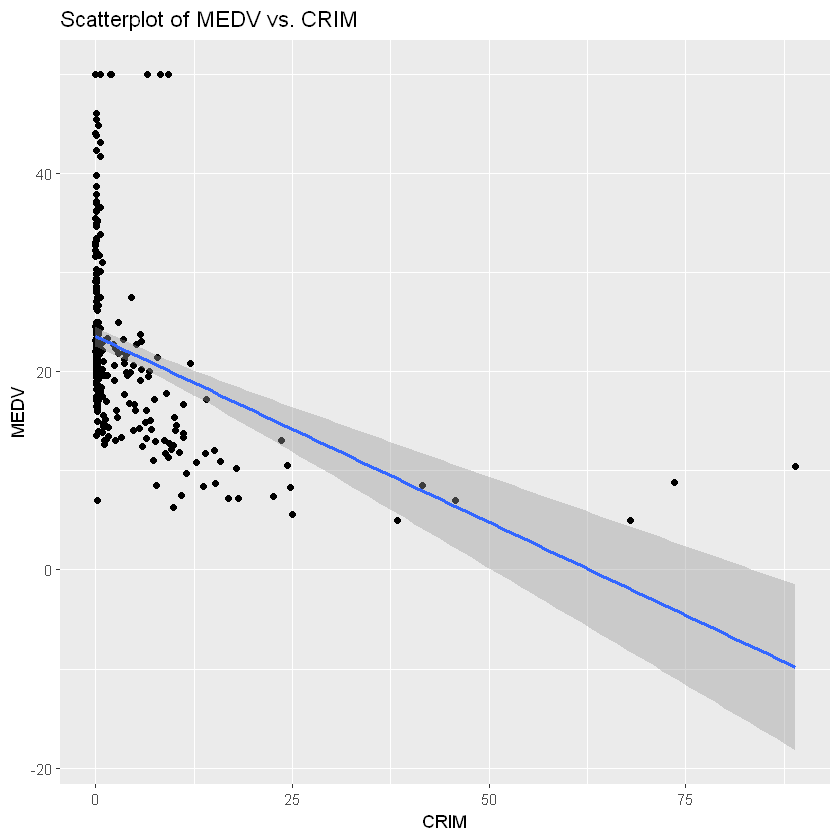

`geom_smooth()` using formula = 'y ~ x'


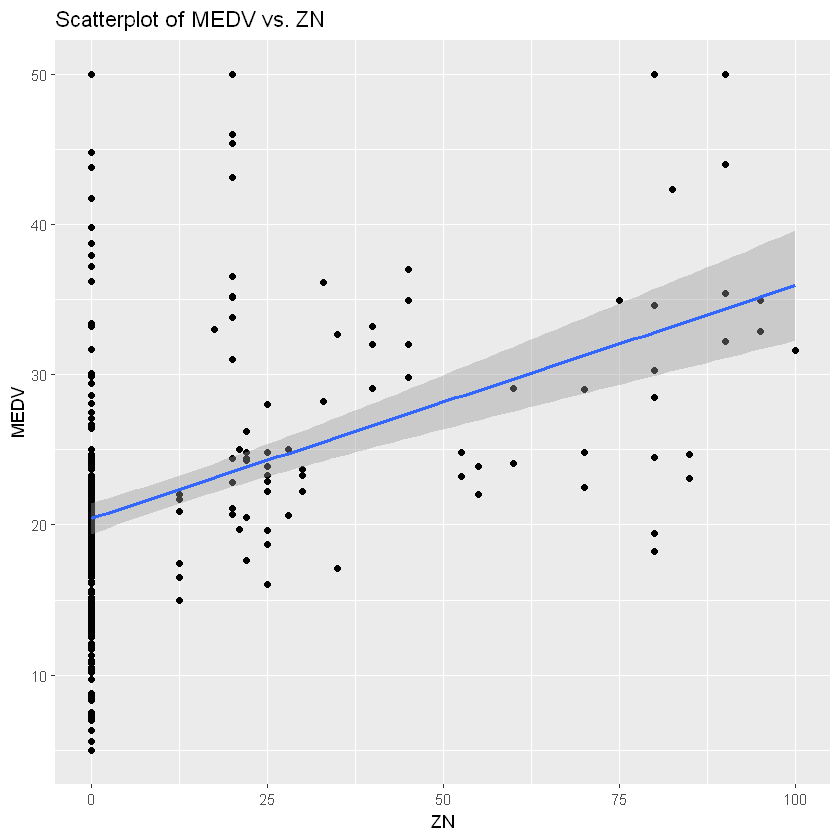

`geom_smooth()` using formula = 'y ~ x'


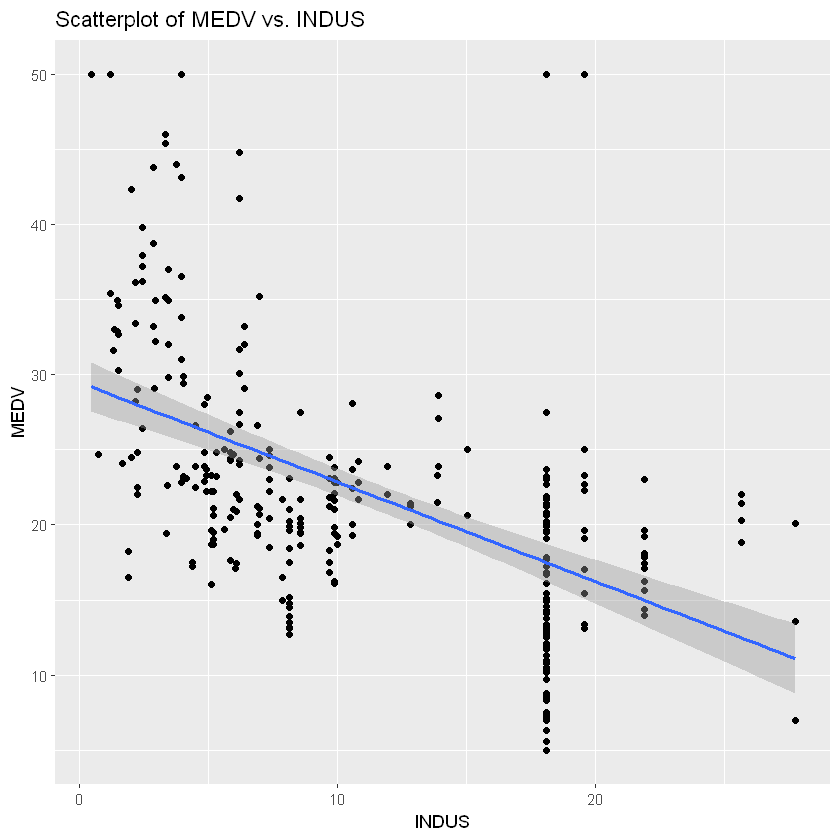

`geom_smooth()` using formula = 'y ~ x'


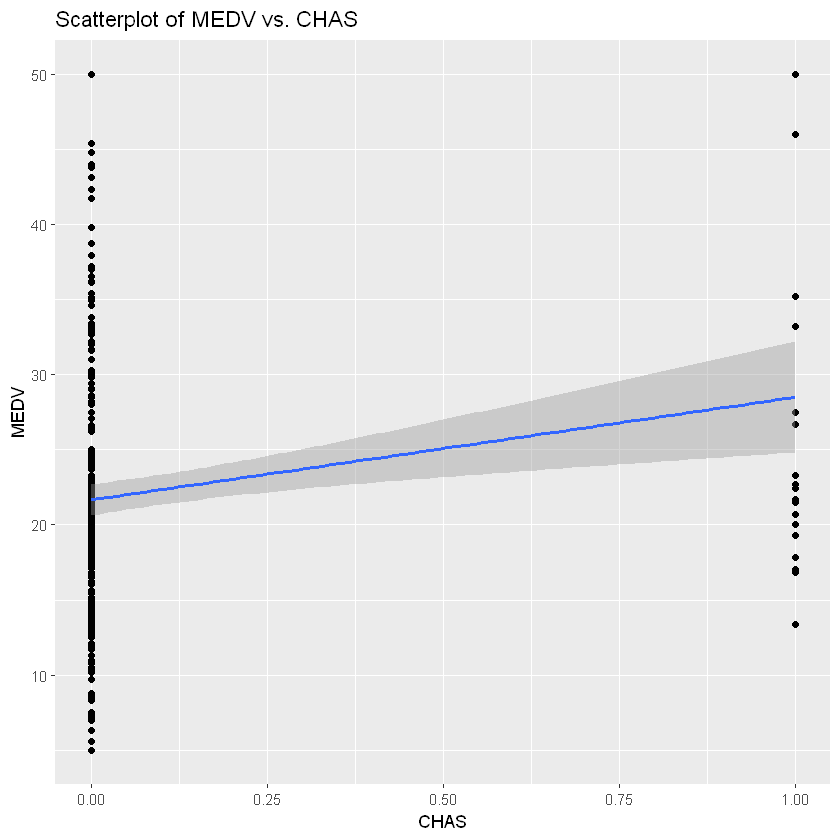

`geom_smooth()` using formula = 'y ~ x'


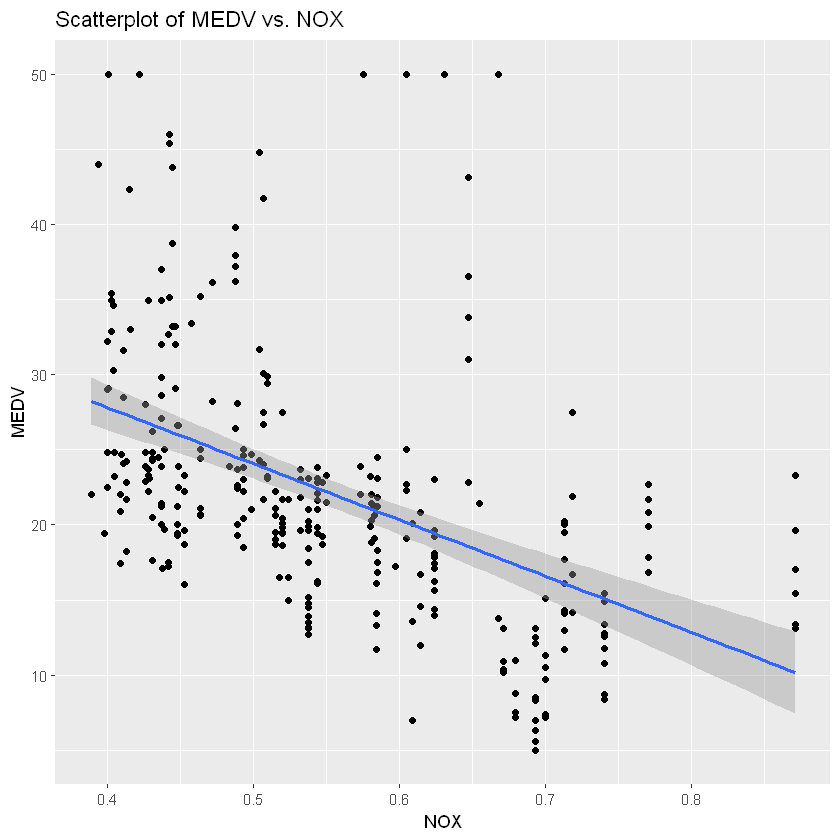

`geom_smooth()` using formula = 'y ~ x'


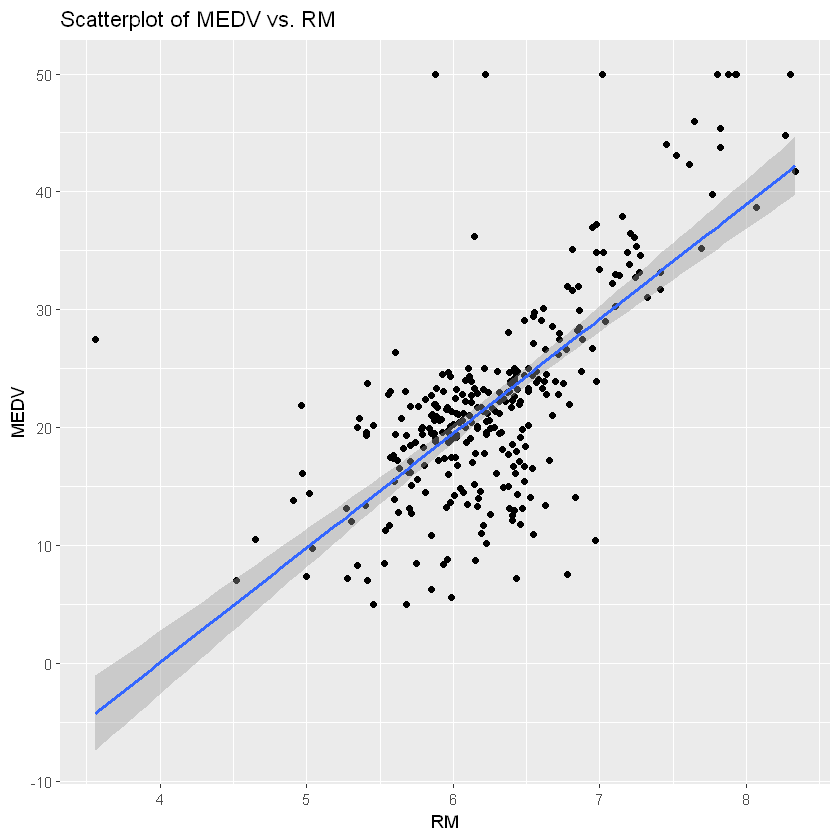

`geom_smooth()` using formula = 'y ~ x'


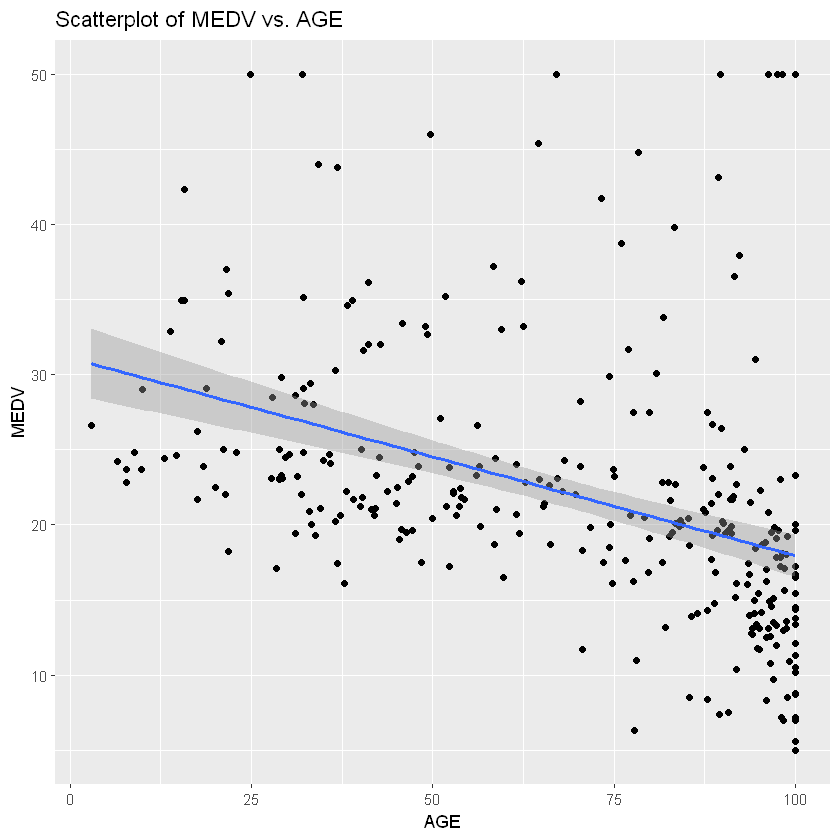

`geom_smooth()` using formula = 'y ~ x'


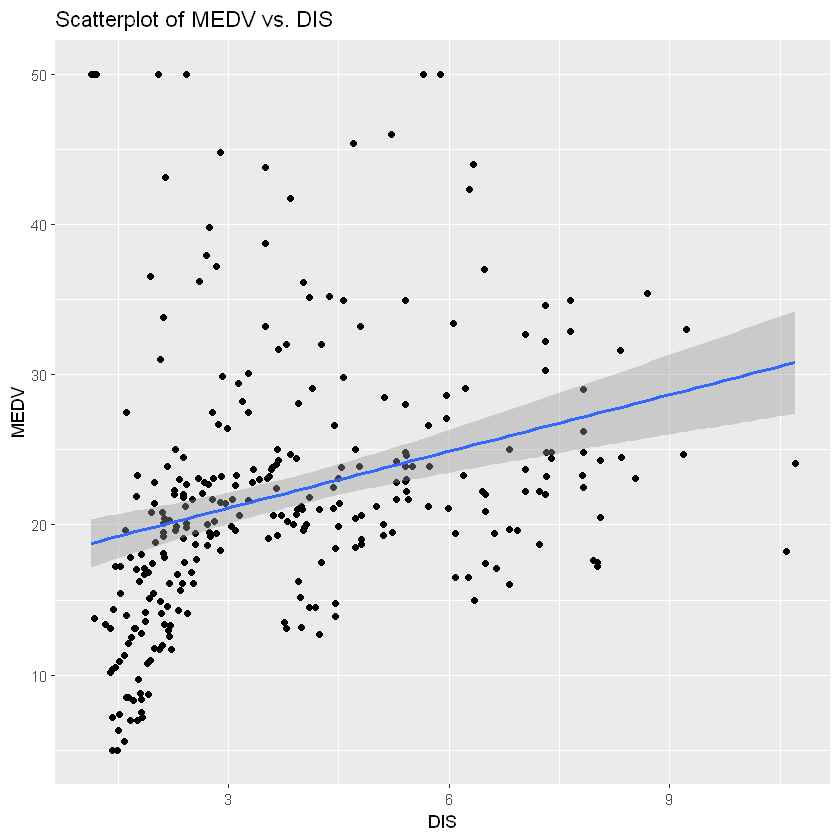

`geom_smooth()` using formula = 'y ~ x'


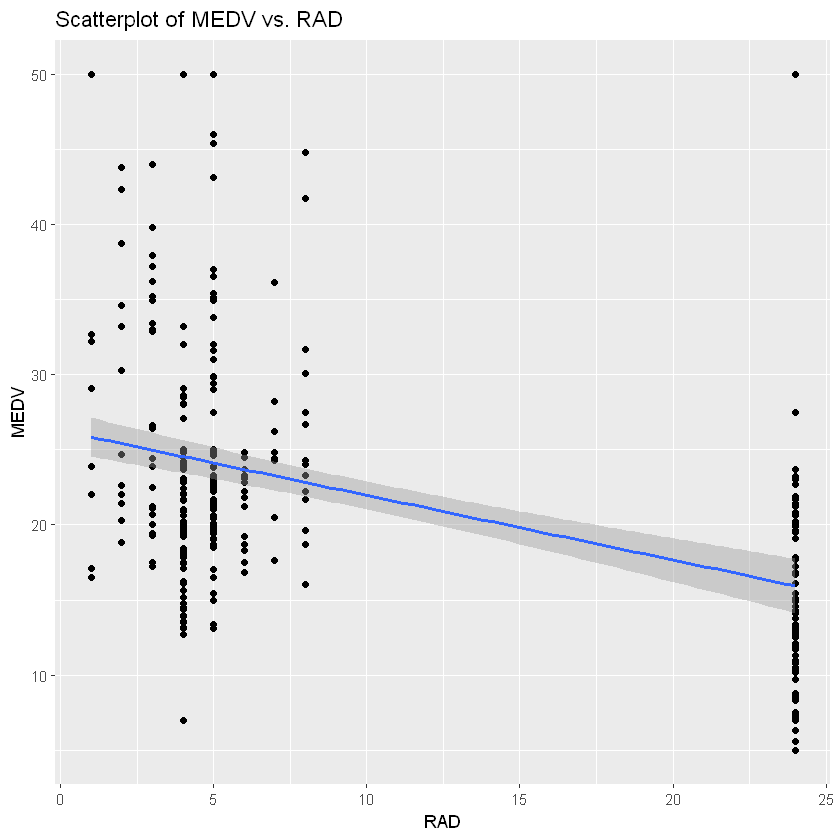

`geom_smooth()` using formula = 'y ~ x'


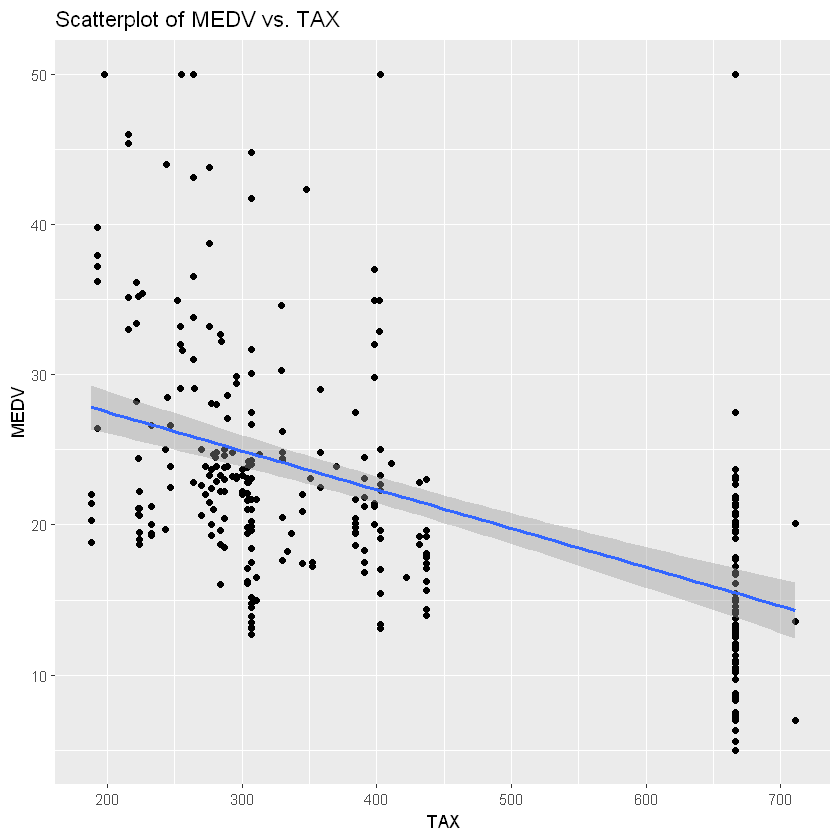

`geom_smooth()` using formula = 'y ~ x'


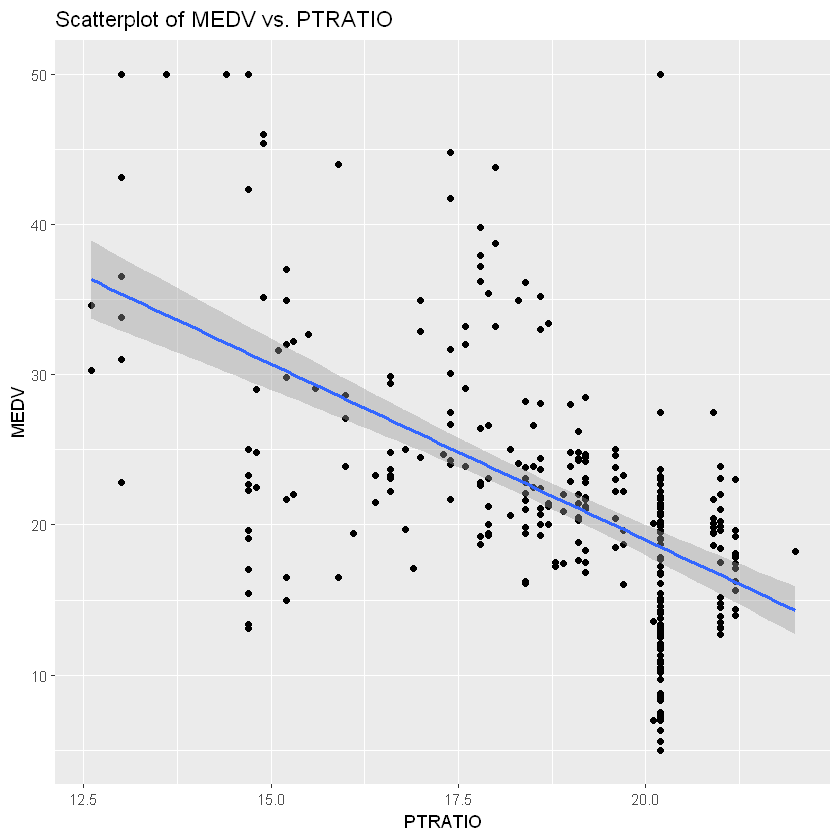

`geom_smooth()` using formula = 'y ~ x'


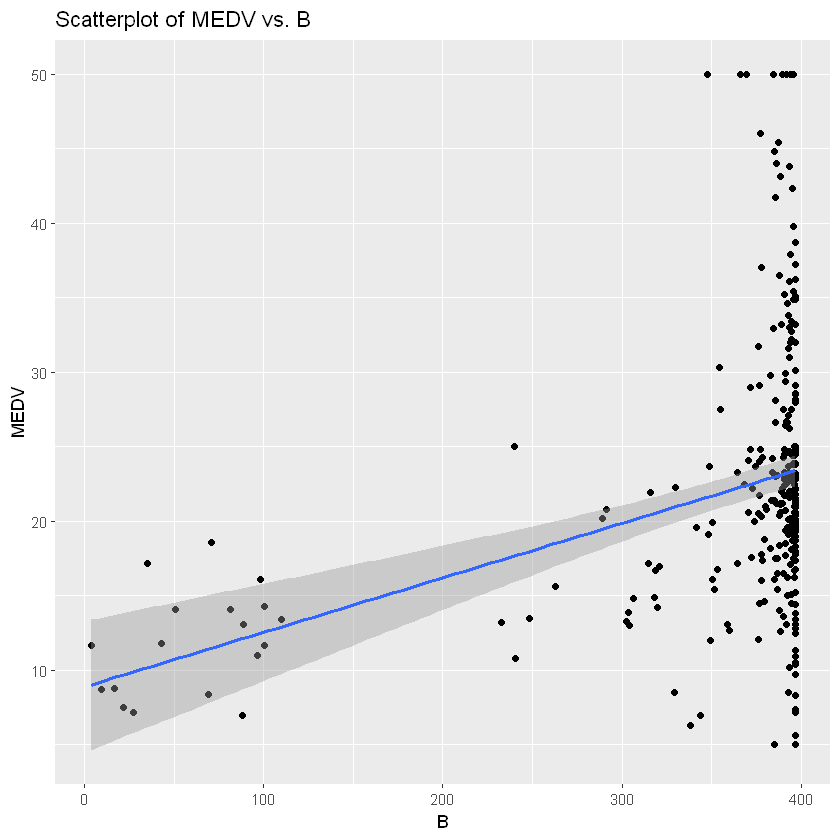

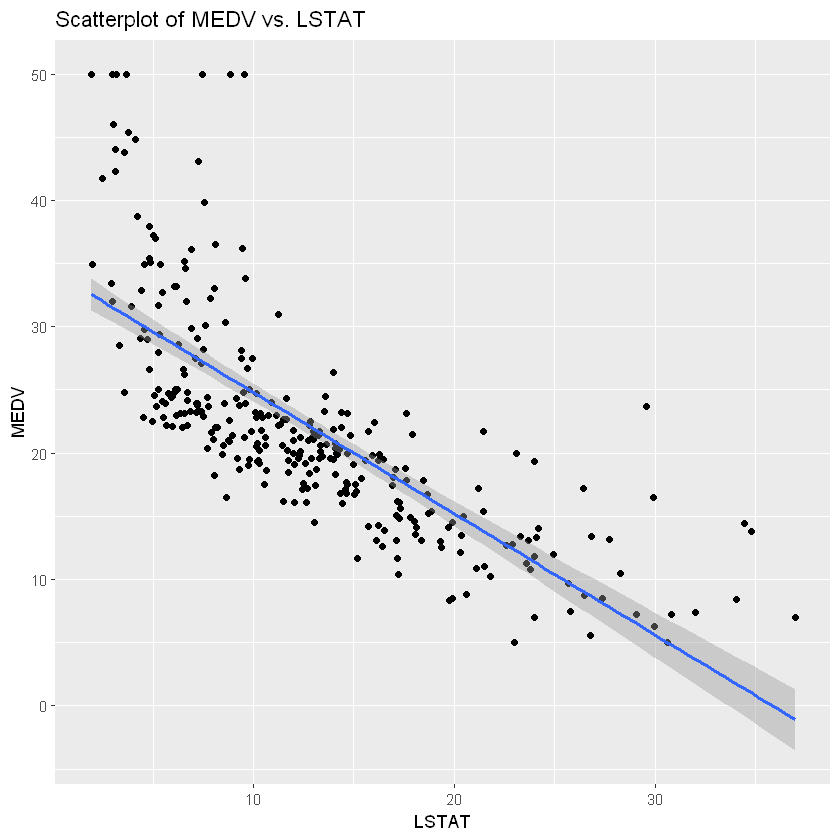

In [3]:
library(ggplot2)
variables <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT")

for (var in variables) {
  plot <- ggplot(data = train, aes_string(x = var, y = "MEDV")) +
    geom_point() +
    geom_smooth(method = "lm") +
    labs(title = paste("Scatterplot of MEDV vs.", var))
  
  print(plot)
}


Here I printed the scatterplots of each other variable as the explanatory and MEDV as the response along with a linear regression to identify relationship with the variables and our target variable to predict. The variables which appear to have the strongest lienear relationships with MEDV are NOX, RM, AGE, DIS, and LSTAT. The other variables may show some linear relationship but are not as strong as the aforementioned. 

<br>

---

<br>






####<font color=red>Task 3</font>  (10 points)

1. Using the `train` dataset, fit regressions with multiple independent variables, using `MEDV` as the dependent variable, based on your visual observations
  * Try several (many!) regression models
  * Determine appropriate functional forms (quadratic? 1/x?)
  * Use combinations of many variables

2. Select the model (that was fit using `train`) that produced the lowest mean squared error on your validation dataset `valid`.

In [4]:
fit1 = lm(MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT, data = train)
summary(fit1)
# Including all variables in the linear regression model and interpreting the summary, I found that my assessment of the scatterplots was mostly correct plus or minus a variable. 

# In the second model, I subtracted all the variables except the ones with the p-values (P-val < 0.001). 
# This means I used the variables I identified in the scatterplots, NOX, RM, DIS, and LSTAT plus a few others I didn't identify before like CHAS and PTRATIO.
# I ended up not using the var AGE that I thought would be a good predictor from the scatterplot.
fit2 = lm(MEDV ~ CHAS + NOX + RM + DIS + PTRATIO + LSTAT, data = train)
summary(fit2)


Call:
lm(formula = MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + 
    DIS + RAD + TAX + PTRATIO + B + LSTAT, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8665 -2.5365 -0.5311  1.5616 25.4523 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.973144   6.764725   5.170 4.41e-07 ***
CRIM         -0.100561   0.033365  -3.014 0.002810 ** 
ZN            0.044347   0.016788   2.642 0.008706 ** 
INDUS        -0.044069   0.073731  -0.598 0.550519    
CHAS          4.381397   0.998916   4.386 1.62e-05 ***
NOX         -17.916485   4.932531  -3.632 0.000333 ***
RM            3.974438   0.553287   7.183 5.92e-12 ***
AGE          -0.012068   0.015859  -0.761 0.447300    
DIS          -1.700655   0.246796  -6.891 3.54e-11 ***
RAD           0.229305   0.078698   2.914 0.003853 ** 
TAX          -0.008541   0.004610  -1.853 0.064945 .  
PTRATIO      -0.822714   0.160619  -5.122 5.56e-07 ***
B             0.008391   0.003513   2.389 0.017


Call:
lm(formula = MEDV ~ CHAS + NOX + RM + DIS + PTRATIO + LSTAT, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4957  -2.5567  -0.6819   1.7719  26.1615 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.78034    5.89025   6.584 2.12e-10 ***
CHAS          5.02988    1.01116   4.974 1.12e-06 ***
NOX         -20.55191    3.99716  -5.142 4.99e-07 ***
RM            3.97046    0.51898   7.650 2.90e-13 ***
DIS          -1.27290    0.20893  -6.093 3.49e-09 ***
PTRATIO      -0.95149    0.14135  -6.732 8.84e-11 ***
LSTAT        -0.62390    0.05515 -11.313  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.464 on 293 degrees of freedom
Multiple R-squared:  0.7574,	Adjusted R-squared:  0.7524 
F-statistic: 152.4 on 6 and 293 DF,  p-value: < 2.2e-16


<br>

---

<br>






####<font color=red>Task 4</font>  (5 points)

1. Attempt to interpret your best performing model from Task 3.
  * This should include interpretation of slopes, p-values, and confidence intervals in the context of the dataset
  * You should interpret each and every variable, if possible, depending on the complexity of functional form used.

In [5]:
summary(fit2)
confint(fit2)


Call:
lm(formula = MEDV ~ CHAS + NOX + RM + DIS + PTRATIO + LSTAT, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4957  -2.5567  -0.6819   1.7719  26.1615 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.78034    5.89025   6.584 2.12e-10 ***
CHAS          5.02988    1.01116   4.974 1.12e-06 ***
NOX         -20.55191    3.99716  -5.142 4.99e-07 ***
RM            3.97046    0.51898   7.650 2.90e-13 ***
DIS          -1.27290    0.20893  -6.093 3.49e-09 ***
PTRATIO      -0.95149    0.14135  -6.732 8.84e-11 ***
LSTAT        -0.62390    0.05515 -11.313  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.464 on 293 degrees of freedom
Multiple R-squared:  0.7574,	Adjusted R-squared:  0.7524 
F-statistic: 152.4 on 6 and 293 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),27.1877887,50.3728982
CHAS,3.0398210,7.0199388
NOX,-28.4187062,-12.6851180
RM,2.9490485,4.9918651
DIS,-1.6840863,-0.8617160
PTRATIO,-1.2296690,-0.6733021
LSTAT,-0.7324424,-0.5153639


My model achieved an R^2 value of 0.7574 meaning that 75.7% of the variabiliy in MEDV was explained by the variables included in my multiple linear regression. This is a strong linear correlation. The variables that were positively correlated were CHAS and RM. The variables that were negatively correlated were NOX, DIS, PTRATIO, and LSTAT. The intercept was 38.78 meaning that the median home value given all explanatory variables are zero is $38,780. All the p-values of the included explanatory varuables is much less than alpha = 0.05 and none of the confidence intervals include the value 0 meaning that the slopes of each with respect to MEDV are statistically significant and there is significant association between each of the explanatory variables and the response variable MEDV. 